In [1]:
# Libraries loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
#%matplotlib notebook
from sklearn.impute import SimpleImputer
import scipy.stats as st

In [2]:
# path to all data files
path1 = "Data/features.csv"
path2 = "Data/test.csv"
path3 = "Data/stores.csv"
path4 = "Data/train.csv"

In [3]:
#reading csv files 
features = pd.read_csv(path1)
test = pd.read_csv(path2)
stores = pd.read_csv(path3)
train = pd.read_csv(path4)

In [4]:
#Merging train, features on common columns
train_features = pd.merge(train,features,on=['Store','Date','IsHoliday'],how='inner')

In [5]:
train_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [6]:
#Merging train, features, stores on common columns
train_features_stores = pd.merge(train_features,stores,on='Store',how='inner')
train_features_stores.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
#Checking for null values
train_features_stores.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [8]:
#It is observed that Markdown 1-5 have almost 65% of missing values
#Treating NaN values with Simple Imputer

markdown=pd.DataFrame(SimpleImputer().fit_transform(train_features_stores[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
train_features_stores = train_features_stores.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
train_features_stores=pd.concat([train_features_stores,markdown],axis=1)

In [9]:
train_features_stores.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
dtype: object

In [10]:
#Since date is of object datatype, I converted it to datetime type and extracting day,month,year from it separetely
train_features_stores['Date']=pd.to_datetime(train_features_stores['Date'])
train_features_stores['year']=train_features_stores['Date'].dt.year
train_features_stores['month']=train_features_stores['Date'].dt.month
train_features_stores['day']=train_features_stores['Date'].dt.day
del train_features_stores['Date']
train_features_stores

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,month,day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,False,58.85,3.882,192.308899,8.667,B,118221,4018.910000,58.080000,100.000000,211.940000,858.330000,2012,10,26
421566,45,94,5203.31,False,58.85,3.882,192.308899,8.667,B,118221,4018.910000,58.080000,100.000000,211.940000,858.330000,2012,10,26
421567,45,95,56017.47,False,58.85,3.882,192.308899,8.667,B,118221,4018.910000,58.080000,100.000000,211.940000,858.330000,2012,10,26
421568,45,97,6817.48,False,58.85,3.882,192.308899,8.667,B,118221,4018.910000,58.080000,100.000000,211.940000,858.330000,2012,10,26


The correlation between both factors is 0.03


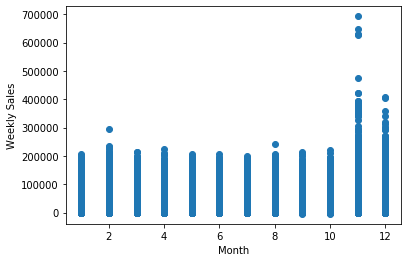

In [19]:
weekly_sales = train_features_stores.iloc[:,2]
month = train_features_stores.iloc[:,16]
correlation = st.pearsonr(month,weekly_sales)
plt.scatter(month,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Month')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.05


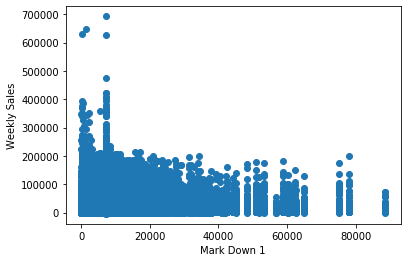

In [18]:
weekly_sales = train_features_stores.iloc[:,2]
mkd1 = train_features_stores.iloc[:,10]
correlation = st.pearsonr(mkd1,weekly_sales)
plt.scatter(mkd1,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Mark Down 1')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.24


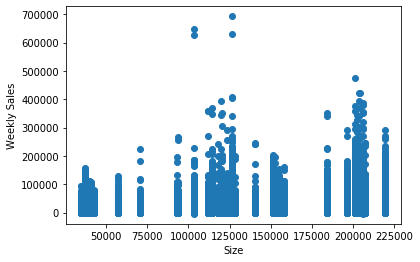

In [17]:
weekly_sales = train_features_stores.iloc[:,2]
size = train_features_stores.iloc[:,9]
correlation = st.pearsonr(size,weekly_sales)
plt.scatter(size,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Size')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.02


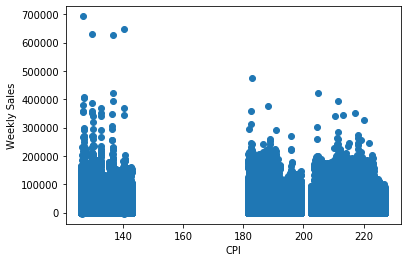

In [11]:
weekly_sales = train_features_stores.iloc[:,2]
cpi = train_features_stores.iloc[:,6]
correlation = st.pearsonr(cpi,weekly_sales)
plt.scatter(cpi,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('CPI')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.03


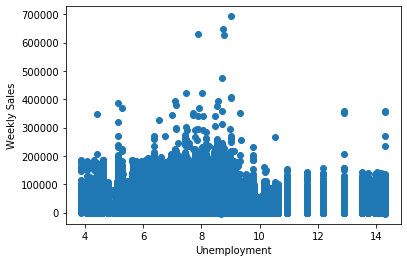

In [12]:
weekly_sales = train_features_stores.iloc[:,2]
Unemployment = train_features_stores.iloc[:,7]
correlation = st.pearsonr(Unemployment,weekly_sales)
plt.scatter(Unemployment,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Unemployment')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.0


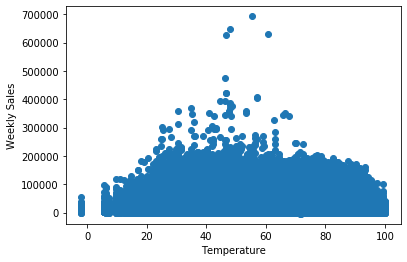

In [15]:
weekly_sales = train_features_stores.iloc[:,2]
temp = train_features_stores.iloc[:,4]
correlation = st.pearsonr(temp,weekly_sales)
plt.scatter(temp,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Temperature')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.0


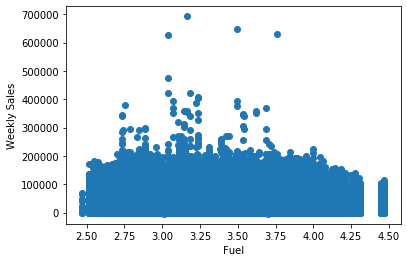

In [16]:
weekly_sales = train_features_stores.iloc[:,2]
fuel = train_features_stores.iloc[:,5]
correlation = st.pearsonr(fuel,weekly_sales)
plt.scatter(fuel,weekly_sales)
plt.ylabel('Weekly Sales')
plt.xlabel('Fuel')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

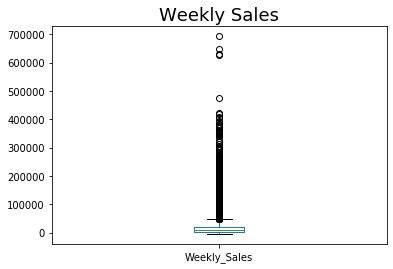

In [13]:
#create box plot for weekly sales
from matplotlib.pyplot import *
train_features_stores['Weekly_Sales'].plot.box()
fig = figure(1,figsize=(20,10))
plt.title('Weekly Sales', fontsize=18)
#plt.ylabel('Sales')
#plt.xlabel('Week', fontsize=16)
plt.show()
fig.savefig("results/weekly_sales_box.png",dpi=300)

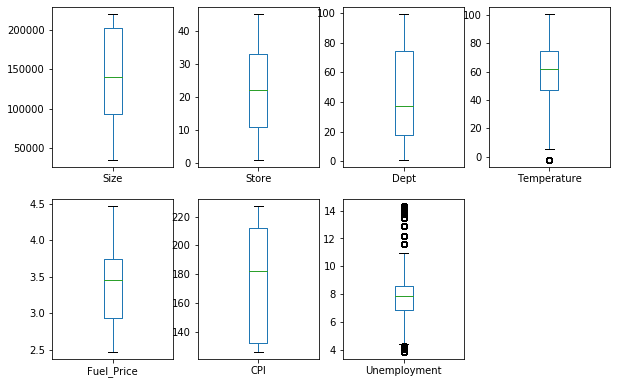

In [14]:
#Checking for outliers
train_features_stores[['Size','Store', 'Dept', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type']].plot(kind='box',subplots=1,layout=(3,4),figsize=(10,10))
plt.savefig("results/box_subplot.png")